# PROJECT1
SALIFOU SYLLA

OCTOBER 21, 2019

# Exploratory Data Analysis of Height and Weight

The dataset used in this article was obtained in Kaggle. Kaggle is an online community of data scientists and machine learners where it can be found a wide variety of datasets. The dataset selected contains the height and weight of 5000 males and 5000 females, and it can be downloaded at the following link: https://www.kaggle.com/datasets



In [144]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## Read the CSV File

In [145]:
df=pd.read_csv('WeightHeight.csv')
print(df)
type(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
7       Male  68.348516  167.971111
8       Male        NaN  175.929440
9       Male  63.456494  156.399676
10      Male  71.195382  186.604926
11      Male  71.640805  213.741169
12      Male  64.766329         NaN
13      Male  69.283070  189.446181
14      Male  69.243732  186.434168
15      Male  67.645620  172.186930
16      Male  72.418317  196.028506
17      Male  63.974326  172.883470
18      Male  69.640060  185.983958
19      Male  67.936005  182.426648
20      Male  67.915050  174.115929
21      Male  69.439440  197.731422
22      Male  66.149132  149.173566
23      Male  75.205974  228.761781
24      Male        NaN  162.006652
25      Male  68.144033  192.343977
26      Male  69.089631  184

pandas.core.frame.DataFrame

In [146]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [147]:
df.shape

(10000, 3)

## Remove Rows With Missing Values

In [148]:
df.dropna(inplace=True)
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
7       Male  68.348516  167.971111
9       Male  63.456494  156.399676
10      Male  71.195382  186.604926
11      Male  71.640805  213.741169
13      Male  69.283070  189.446181
14      Male  69.243732  186.434168
15      Male  67.645620  172.186930
16      Male  72.418317  196.028506
17      Male  63.974326  172.883470
18      Male  69.640060  185.983958
19      Male  67.936005  182.426648
20      Male  67.915050  174.115929
21      Male  69.439440  197.731422
22      Male  66.149132  149.173566
23      Male  75.205974  228.761781
25      Male  68.144033  192.343977
26      Male  69.089631  184.435174
27      Male  72.800844  206.828189
28      Male  67.421242  175.213922
29      Male  68.496415  154

In [149]:
df.describe()

,Height,Weight
count,9958.000000,9958.000000
mean,66.373205,161.486791
std,3.845645,32.114576
min,54.263133,64.700127
25%,63.522005,135.833589
50%,66.323944,161.325064
75%,69.180141,187.214463
max,78.998742,269.989698


In [150]:
df.Height.median()

66.32394400999999

In [151]:
df.Weight.median()

161.3250639

## HISTOGRAMS
To better understand the distribution of the variables Height and Weight, we can simply plot both variables using histograms.

Text(0, 0.5, 'Frequency')

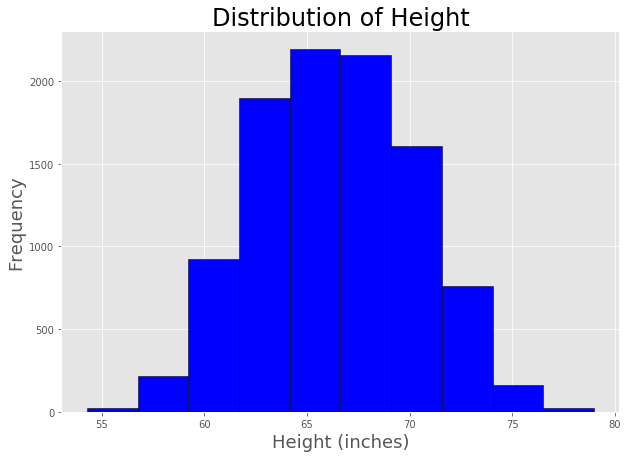

In [201]:
plt.style.use('ggplot')

# Histogram of the height
df.Height.plot(kind='hist',color='blue',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

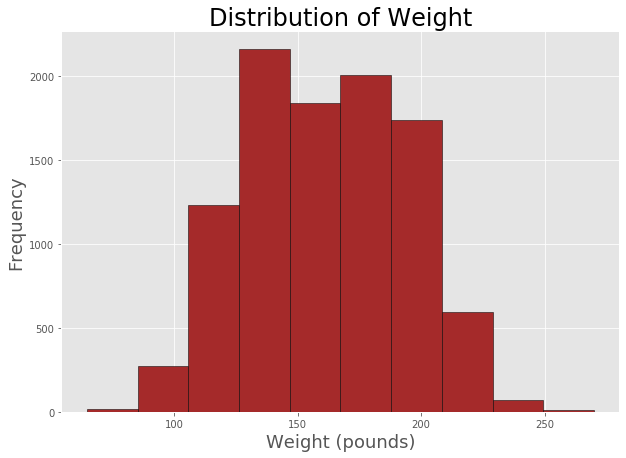

In [155]:
# Histogram of the weight
df.Weight.plot(kind='hist',color='brown',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

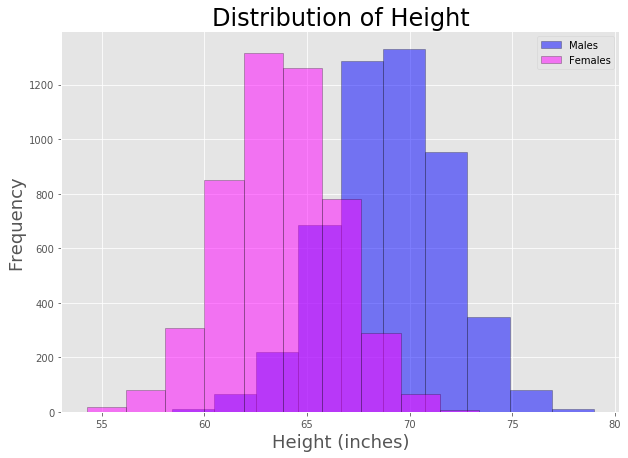

In [156]:
# Histogram of the height males and females

df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

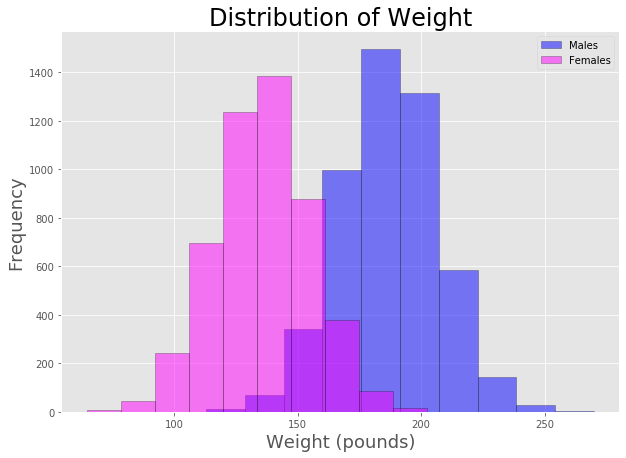

In [157]:
# Histogram of the weight males and females

df[df['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

The plots show that both height and weight present a normal distribution for males and females. Although the average of both distribution is larger for males, the spread of the distributions is similar for both genders. 

## SCATTER PLOT

The following plot shows the relation between height and weight for males and females. We use A scatter plot is a two dimensional data visualization that shows the relationship between two numerical variables — one plotted along the x-axis and the other plotted along the y-axis. The following plot shows the relation between height and weight for males and females.

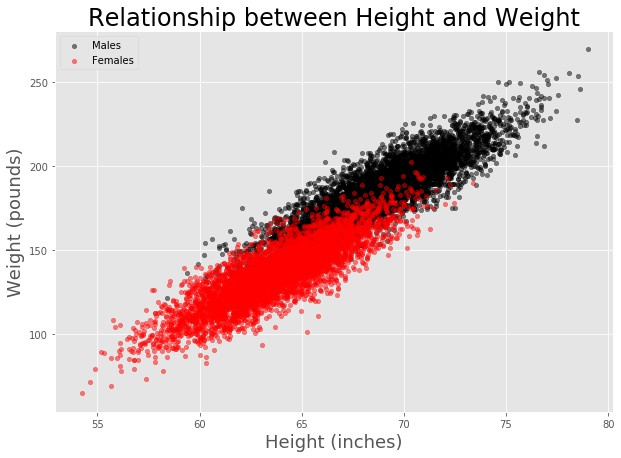

In [160]:
# Scatter plot of Height and Weight
ax1= df[df['Gender']=='Male'].plot(kind='scatter', x='Height',y='Weight', color='black',alpha=0.5, figsize=(10,7))
df[df['Gender']=='Female'].plot(kind='scatter', x='Height',y='Weight', color='red',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

## BOOTSTRAP SIMMULATION
Run the bootstrapp simmulation and calculate the medians.

In [188]:
data_sample = df.Height[np.random.choice(df.Height.index, 1000)]
data_sample.median()

66.55857652

In [189]:
data_sampleW = df.Weight[np.random.choice(df.Weight.index, 1000)]
data_sampleW.median()

159.90215340000003

In [190]:
#np.random.seed(111)
resamples_medians = pd.Series(index = np.arange(1000))
resamples_mediansW = pd.Series(index = np.arange(1000))
for i in range(1000):
    resamples_medians[i] = data_sample.sample(1000, replace=True).median()
    resamples_mediansW[i] = data_sampleW.sample(1000, replace=True).median()
print(resamples_medians.median())
print(resamples_medians.mean())
print(resamples_medians.quantile(0.025))
print(resamples_medians.quantile(0.975))



66.55857652
66.51237740545496
66.17874391000001
66.756652015


In [191]:
print(resamples_mediansW.median())
print(resamples_mediansW.mean())
print(resamples_mediansW.quantile(0.025))
print(resamples_mediansW.quantile(0.975))

159.9693082
160.03233790874972
156.789402
162.85618756000002


### We can compare the statistics from the bootstrap sample with the original data of Height 

In [193]:
sumdata1 = [['Median',round(np.median(df.Height),2),round(np.median(resamples_medians),2),round(np.median(df.Height)-np.median(resamples_medians),2)]]
sumtable1 = pd.DataFrame(sumdata1,columns=['Stat','Original','Simulated','Delta'])
print(sumtable1)

     Stat  Original  Simulated  Delta
0  Median     66.32      66.56  -0.23


### We can compare the statistics from the bootstrap sample with the original data of Weight 

In [195]:
sumdata2 = [['Median',round(np.median(df.Weight),2),round(np.median(resamples_mediansW),2),round(np.median(df.Weight)-np.median(resamples_mediansW),2)]]
sumtable2 = pd.DataFrame(sumdata2,columns=['Stat','Original','Simulated','Delta'])
print(sumtable2)

     Stat  Original  Simulated  Delta
0  Median    161.33     159.97   1.36
